In [1]:
from __future__ import unicode_literals

In [4]:
import this

In [5]:
import antigravity

In [6]:
import geopandas as gpd
import pandas as pd

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
## Mi receta personal
#from matplotlib import rcParams
#rcParams.update({'font.size':20, 'font.family': 'sans'})#60,40
textplotsize = 11
rcParams['axes.labelsize'] = textplotsize
rcParams['xtick.labelsize'] = textplotsize
rcParams['ytick.labelsize'] = textplotsize
rcParams['legend.fontsize'] = textplotsize
rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Bitstream Vera Sans']
rcParams['text.usetex'] = True
rcParams['savefig.dpi'] = 200
from matplotlib.ticker import MaxNLocator
my_locator = MaxNLocator(8)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

In [19]:
xPoints=linspace(-15,15,256)
yPoints=linspace(-15,15,256)
X, Y  = np.meshgrid(xPoints,yPoints,indexing='ij')

In [20]:
ele = 1
PHI = arctan2(Y,X)
RAD = sqrt(X**2+Y**2)
Bx = (RAD**ele) * cos(ele*PHI)
By = -(RAD**ele) * sin(ele*PHI)
magB = sqrt(Bx**2+By**2)

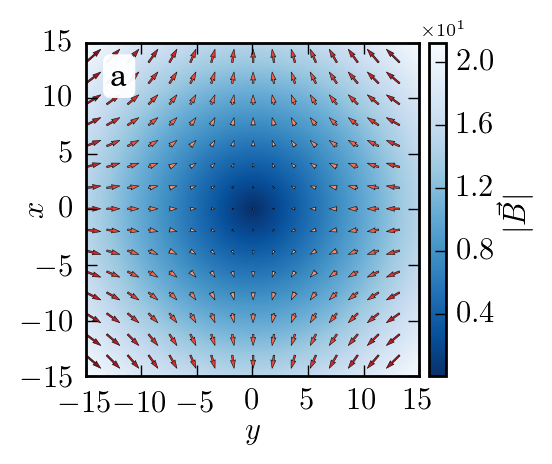

In [21]:
# Global scale, dont change!, ie. better work with a fix size in press edition
scale = 120
# Image size
width,height = 3*scale,3*scale

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig = figure(figsize=figsize, dpi=dpi, facecolor="white")
hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)
ax = fig.add_axes([border*hpixel, border*vpixel,
                  1-2*border*hpixel, 1-2*border*vpixel])
sampling=16

ax.text(0.1, 0.9,"a",fontsize=textplotsize,
                verticalalignment='center', ha="center",
                transform=ax.transAxes,
                bbox=dict(edgecolor='none',facecolor='w', boxstyle='round,pad=0.25',alpha=.95),
                color='black')

#stream = ax.streamplot(X, Y, Bx, By, color=magB, linewidth=magB/magB.max()*1.5, cmap='Reds', 
#                    density=1, arrowsize=0.8,arrowstyle='fancy')
ax.quiver( Y[::sampling,::sampling],X[::sampling,::sampling],
                    By[::sampling,::sampling],Bx[::sampling,::sampling],
                    magB[::sampling,::sampling],width=0.15,linewidth=0.2,
                           cmap='Reds', alpha =0.95 , angles='xy', units='xy')
magn = ax.imshow(magB, origin='lower',cmap='Blues_r',extent=[xPoints[0],xPoints[-1],yPoints[0],yPoints[-1]])

divVel = make_axes_locatable(ax)
colVel = divVel.append_axes("right", size="5%", pad=0.05)
cbaux = colorbar(magn, cax=colVel,orientation='vertical')
cbaux.set_label(r'$|\vec{B}|$',rotation='vertical',va='top', labelpad=0)

tick_locator = ticker.MaxNLocator(nbins=6)
cbaux.locator = tick_locator
cbaux.formatter.set_powerlimits((0, 0))
offset = cbaux.ax.get_yaxis().get_offset_text()
offset.set_horizontalalignment('center')
offset.set_fontsize(6)
cbaux.update_ticks()

ax.set_xlabel('$y$', labelpad=0)
ax.set_ylabel('$x$', labelpad=-10)


fig.savefig('quadrupole.pdf',transparent=True, bbox_inches='tight',
        frameon=None)

In [12]:
fig.savefig('quadrupole.jpg',transparent=True, bbox_inches='tight',
        frameon=None)

In [13]:
gdf = gpd.read_file('data/Municipios/')
gdf.head()

IOError: no such file or directory: 'data/Municipios/'

In [ ]:
gdf.plot(column='OID'),gdf.plot(column='CVE_ENT', cmap='Blues')

NameError: name 'gdf' is not defined

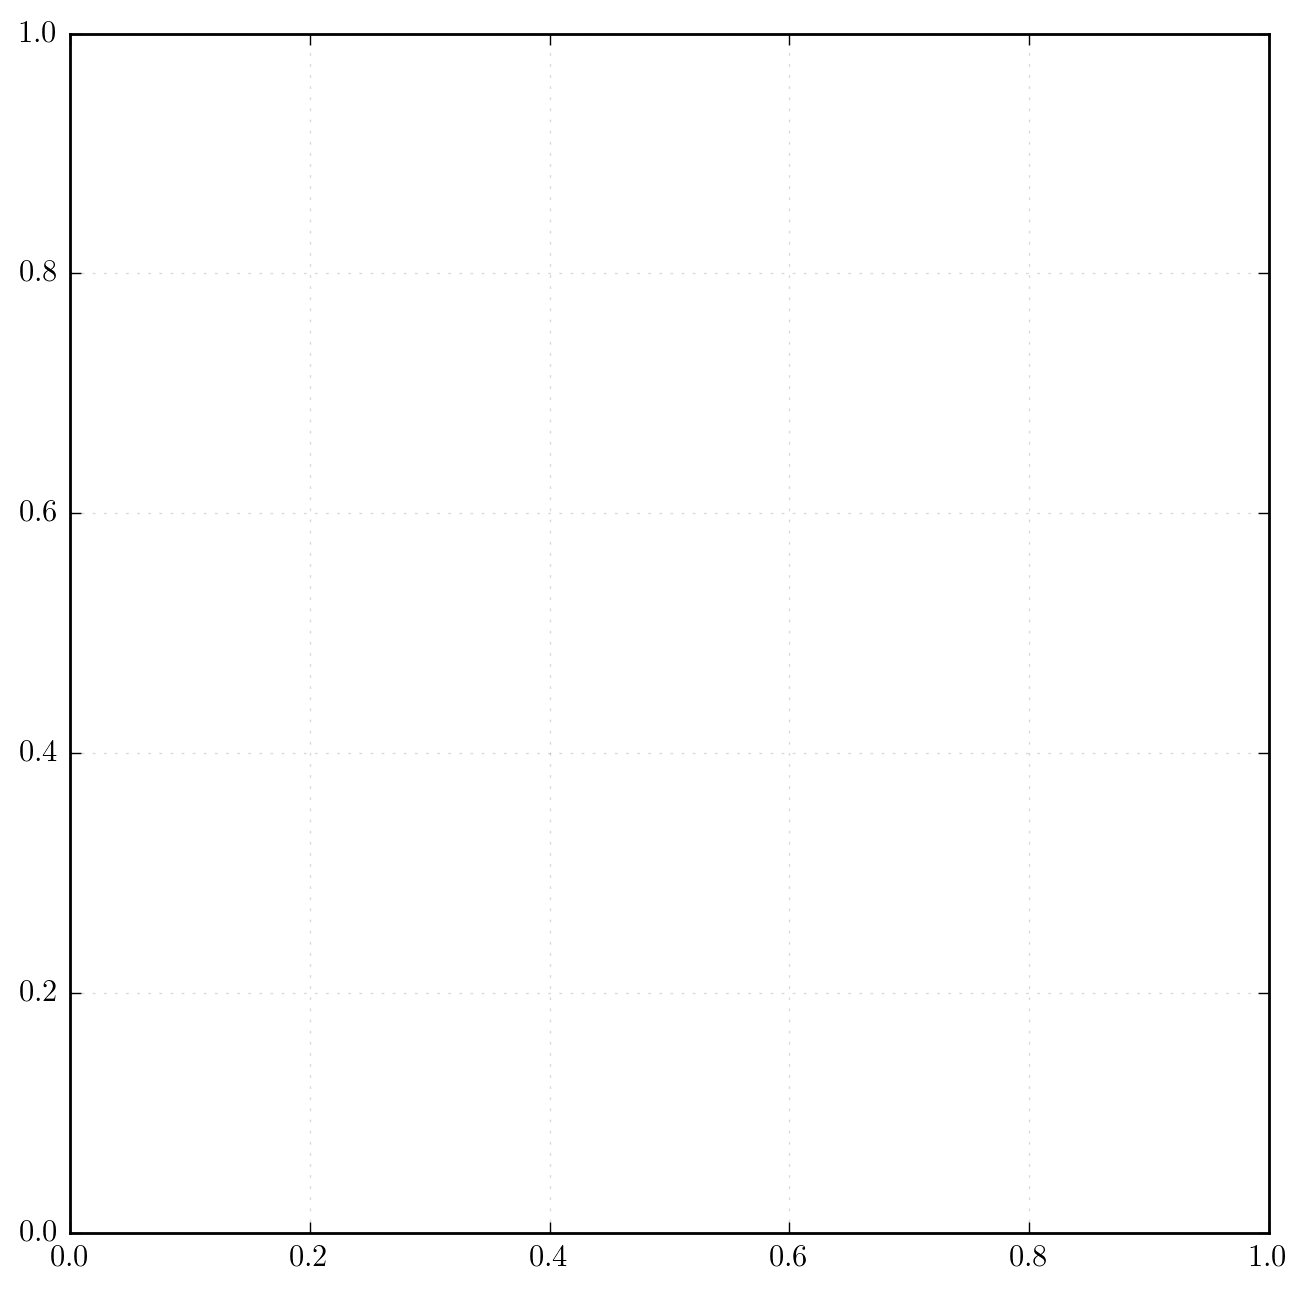

In [17]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdf.plot(ax=ax,column='CVE_ENT', cmap='inferno', alpha=0.5,edgecolor=(0.5,0.5,0.5),lw=0.1)
munis.get_xlim()

In [ ]:
gdfEstados = gdf.dissolve('CVE_ENT', aggfunc='sum')

In [ ]:
gdfEstados.info()

In [ ]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
munis.get_xlim()

Marquemos los probes, de la ocacion anterior

In [ ]:
vehicles = pd.read_csv('data/probe.probe').sample(10000)
vehicles.head()

In [ ]:
from shapely.geometry import Point, LineString, \
            MultiPoint, MultiLineString, Polygon, MultiPolygon

In [ ]:
hacerPoint = lambda row: Point(row.x,row.y)
vehicles['geometry'] = vehicles.apply(hacerPoint,axis=1)
vehicles = gpd.GeoDataFrame(vehicles,geometry='geometry')

In [ ]:
vehicles.head()

In [ ]:
vehicles.loc[vehicles.provider==1].head()

In [ ]:
type(vehicles)

In [ ]:
gdfEstados = gdfEstados.to_crs({'init' :'epsg:4326'})
gdfEstados.crs
#vehicles = vehicles.to_crs({'init' :'epsg:4326'})

NameError: name 'gdfEstados' is not defined

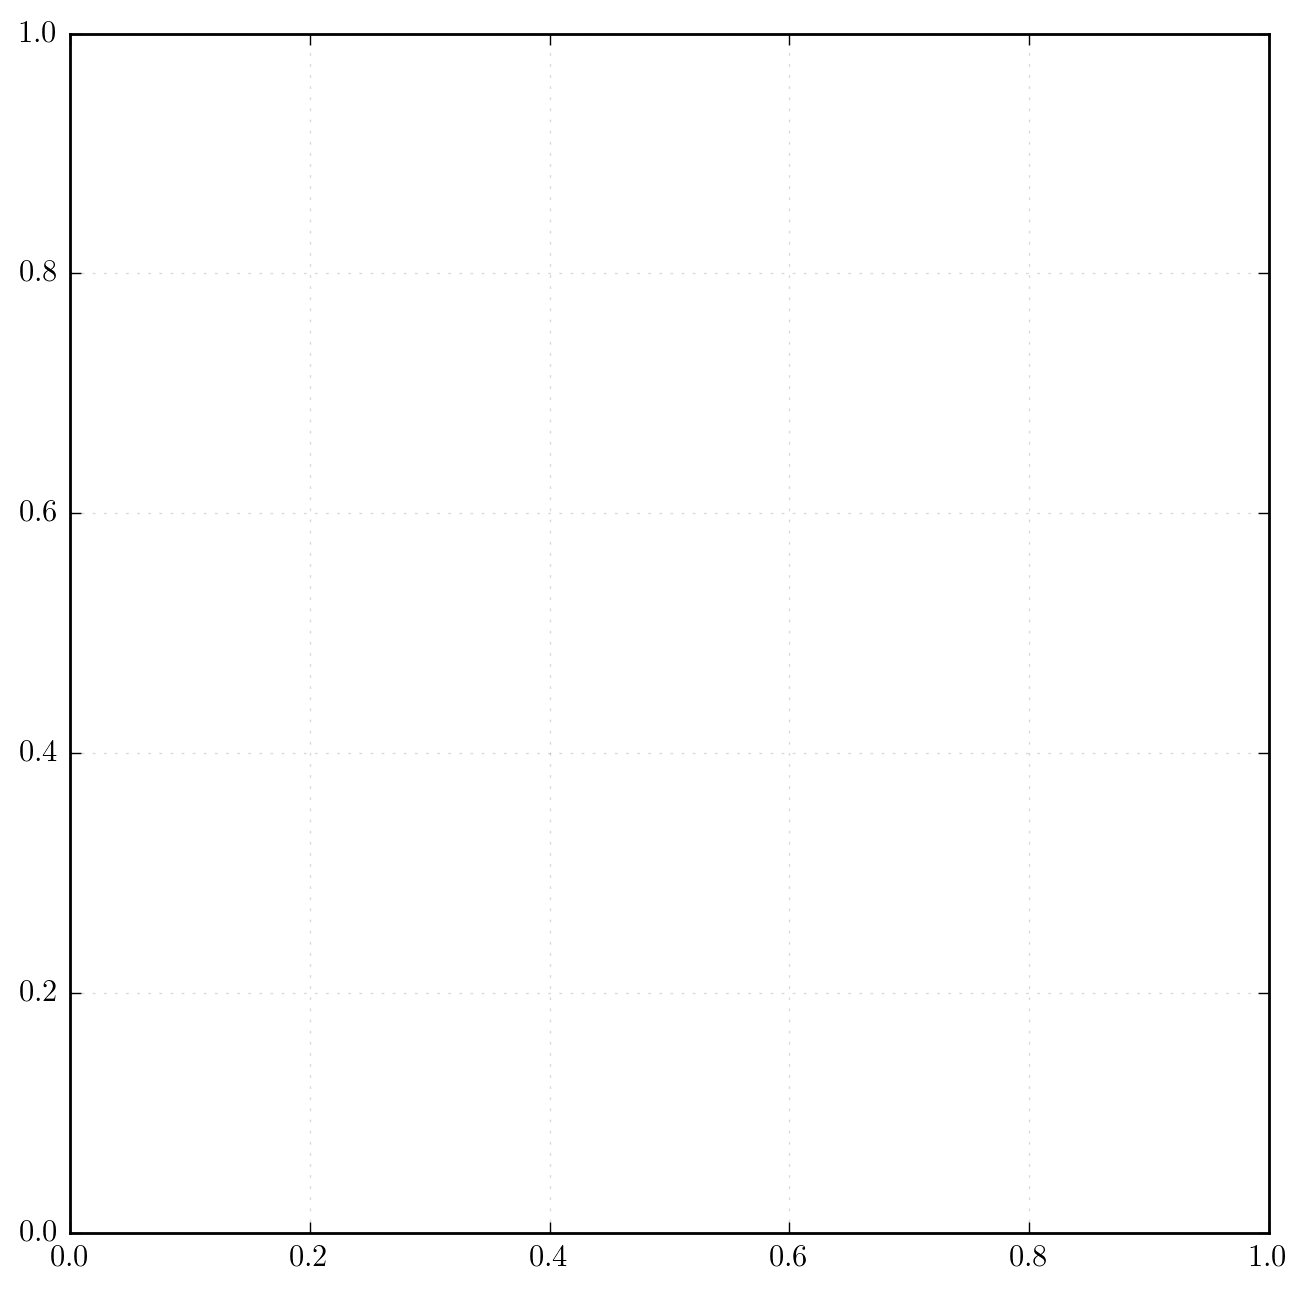

In [16]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
vs = vehicles.loc[vehicles.provider==1].plot(ax=ax, marker='.', color='red', 
                                             markersize=1, label='provider 1', alpha=0.25)
vs = vehicles.loc[vehicles.provider==2].plot(ax=ax, marker=',', color='blue', 
                                             markersize=1, label='provider 2', alpha=0.1)

vs = vehicles.loc[vehicles.provider==7].plot(ax=ax, marker='^', color='green', 
                                             markersize=1, label='provider 7', alpha=0.1)

ax.legend(loc=3,labelspacing=0.1,fancybox=True ,handlelength=1., borderaxespad=.5, 
       borderpad=0.5, fontsize=textplotsize)
munis.get_xlim()

In [ ]:
fig.savefig('myMAP.pdf',transparent=True, bbox_inches='tight',
        frameon=None)

In [15]:
norm = Normalize()
colorMAP = cm.Reds(norm(vehicles.loc[vehicles.provider==1,'speed'].map(abs).values))

NameError: name 'vehicles' is not defined

NameError: name 'gdfEstados' is not defined

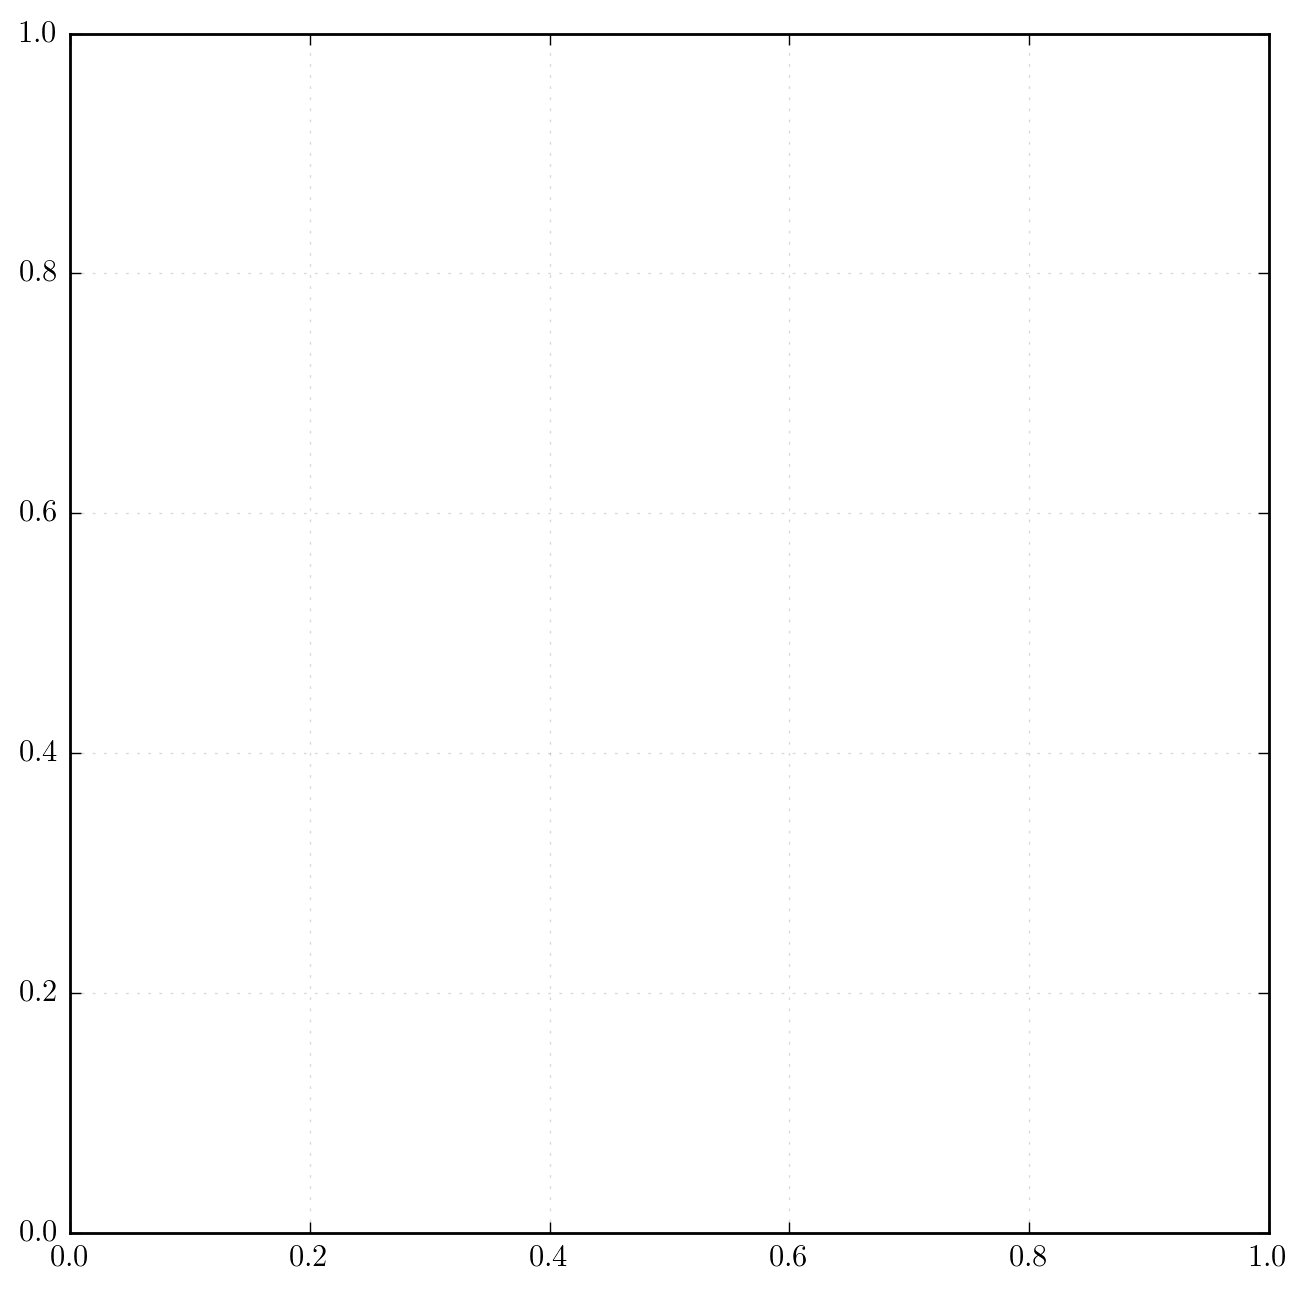

In [14]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
ax.set_aspect('equal')
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
munis = gdfEstados.plot(ax=ax,column='OID', cmap='magma', alpha=0.75,edgecolor=(0.5,0.5,0.5),lw=0.1)
vs = vehicles.loc[vehicles.provider==1].plot(ax=ax, marker='o', 
                                             color=colorMAP,# cmap='Blues',
                                             markersize=1+0.05*vehicles.loc[vehicles.provider==1,
                                                                            'speed'].map(abs))

#vehicles.loc[vehicles.provider==5].plot( marker='o', color='green', markersize=5)

In [163]:
norm = Normalize()
colorMAP = cm.Reds(norm(vehicles.loc[vehicles.provider==1,'speed'].map(abs).values))

In [146]:
vMax  = vehicles.loc[vehicles.provider==1,'speed'].max()

170.0

vehicles.loc[vehicles.provider==1,'speed'].map(lambda x:x/170.)

In [144]:
vehicles.loc[vehicles.provider==1,'speed'].map(abs).mean(),vehicles.loc[vehicles.provider==1,'speed'].mean()

(27.602445652173913, 27.602445652173913)

## Quiz: Haga lo mismo para la CDMX, o el estado de su preferencia.
## Quiz: Como eliminarian los datos con velocidad 0, y asi determinar las rutas más rápidas?

## Quiz: Haganlo para las tiendas COPP
## Quiz: Hagan un histograma por velocidad, para cada provider. Que clase de distribucion es?

vehicles.provider

vehicles.loc[vehicles.provider==1,'speed'].map(abs)

## Datos sismo: https://earthquake.usgs.gov/earthquakes/eventpage/us2000ar20#shakemap

In [23]:
gdfEstados = gpd.read_file('/home/rene/Documentos/Scripts/data/Municipios/')
gdfEstados = gdfEstados.to_crs({'init' :'epsg:4326'})
gdfEstados.crs
gdfCDMX = gdfEstados.loc[gdfEstados.CVE_ENT=='09',:]

In [24]:
gdfCDMX.crs

{'init': 'epsg:4326'}

In [25]:
gdfCDMX.head()

,CVE_ENT,CVE_MUN,NOM_MUN,OID,geometry
0,09,012,Tlalpan,1,"POLYGON ((-99.1967110331436 19.30240497001839,..."
1,09,013,Xochimilco,2,POLYGON ((-99.13301433831455 19.21009500703628...
2,09,008,La Magdalena Contreras,3,POLYGON ((-99.24488741070159 19.27620941570171...
3,09,002,Azcapotzalco,4,POLYGON ((-99.15718110621088 19.50284888316681...
4,09,014,Benito Ju�rez,5,POLYGON ((-99.14349968483091 19.35724145471904...


import geopandas as gpd
import pandas as pd
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled by default

from convertMKLMKZ import *

a = keyholemarkup2x('data/danos_y_derrumbes.kmz',output='gpd')
a = keyholemarkup2x('data/danos_y_derrumbes.kmz',output='shp')

In [27]:
sismicShape     = gpd.read_file('data/shape/')
sismicIntensity = gpd.read_file('data/cont_mi.json')
sismicStations  = gpd.read_file('data/stationlist.json')

IOError: no such file or directory: 'data/shape/'

In [34]:
sismicIntensity.head()

,value,units,color,weight,geometry
0,2.5,intensity,#b0d9ff,4,"(LINESTRING (-102.211637484 13.8099, -102.2137..."
1,3.0,intensity,#a0e6ff,2,"(LINESTRING (-93.48869999999999 15.7641030746,..."
2,3.5,intensity,#90f3ff,4,"(LINESTRING (-98.5553666667 22.4991260323, -98..."
3,4.0,intensity,#80ffff,2,"(LINESTRING (-99.1887 20.5252613119, -99.18036..."
4,4.5,intensity,#7dffc9,4,"(LINESTRING (-98.3803666667 20.1909974637, -98..."


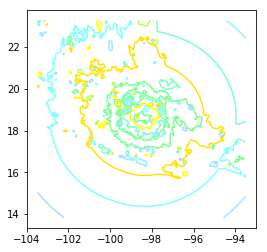

In [36]:
sismicIntensity.plot(color=sismicIntensity.color.values)

In [8]:
sismicStations.head()

,id,code,name,instrumentType,source,network,commType,location,intensity,intensity_flag,pga,pgv,distance,channels,imagemap,geometry
0,DYFI.1,1,UTM:(13Q 0668 2287 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,2.0,,0.00,0.00,556.90,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [77, 203...",POINT (-103.3823 20.6793)
1,DYFI.10,10,UTM:(14Q 0469 2140 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,5.4,,7.91,8.20,120.79,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [269, 26...",POINT (-99.29040000000001 19.3583)
2,DYFI.100,100,UTM:(14Q 0483 2137 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,6.5,,16.11,18.28,109.79,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 27...",POINT (-99.1571 19.3314)
3,DYFI.101,101,UTM:(14Q 0483 2138 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,6.3,,14.20,15.80,110.45,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 26...",POINT (-99.1571 19.3404)
4,DYFI.102,102,UTM:(14Q 0483 2139 1000),OBSERVED,USGS (Did You Feel It?),DYFI,,,7.5,,29.92,37.89,111.12,"[ { ""name"": ""DERIVED"", ""amplitudes"": [ { ""name...","{u'shape': u'circle', u'coordinates': [275, 26...",POINT (-99.1571 19.3494)


In [9]:
sismicShape.head()

,AREA,PERIMETER,PGAPOL_,PGAPOL_ID,GRID_CODE,PARAMVALUE,geometry
0,0.0,0.0,2,1,2,0.02,POLYGON ((-97.52909063364115 21.44888066783831...
1,0.0,0.0,3,2,2,0.02,POLYGON ((-98.79750561373764 21.42388945518453...
2,0.0,0.0,4,3,2,0.02,POLYGON ((-98.04846501555183 21.35724622144112...
3,0.0,0.0,5,4,2,0.02,POLYGON ((-98.06553333339951 21.34058541300527...
4,0.0,0.0,6,5,2,0.02,"POLYGON ((-97.5398167336634 21.24895096660808,..."


In [10]:
sismicShape.crs,sismicStations.crs

({'init': u'epsg:4326'}, {'init': u'epsg:4326'})

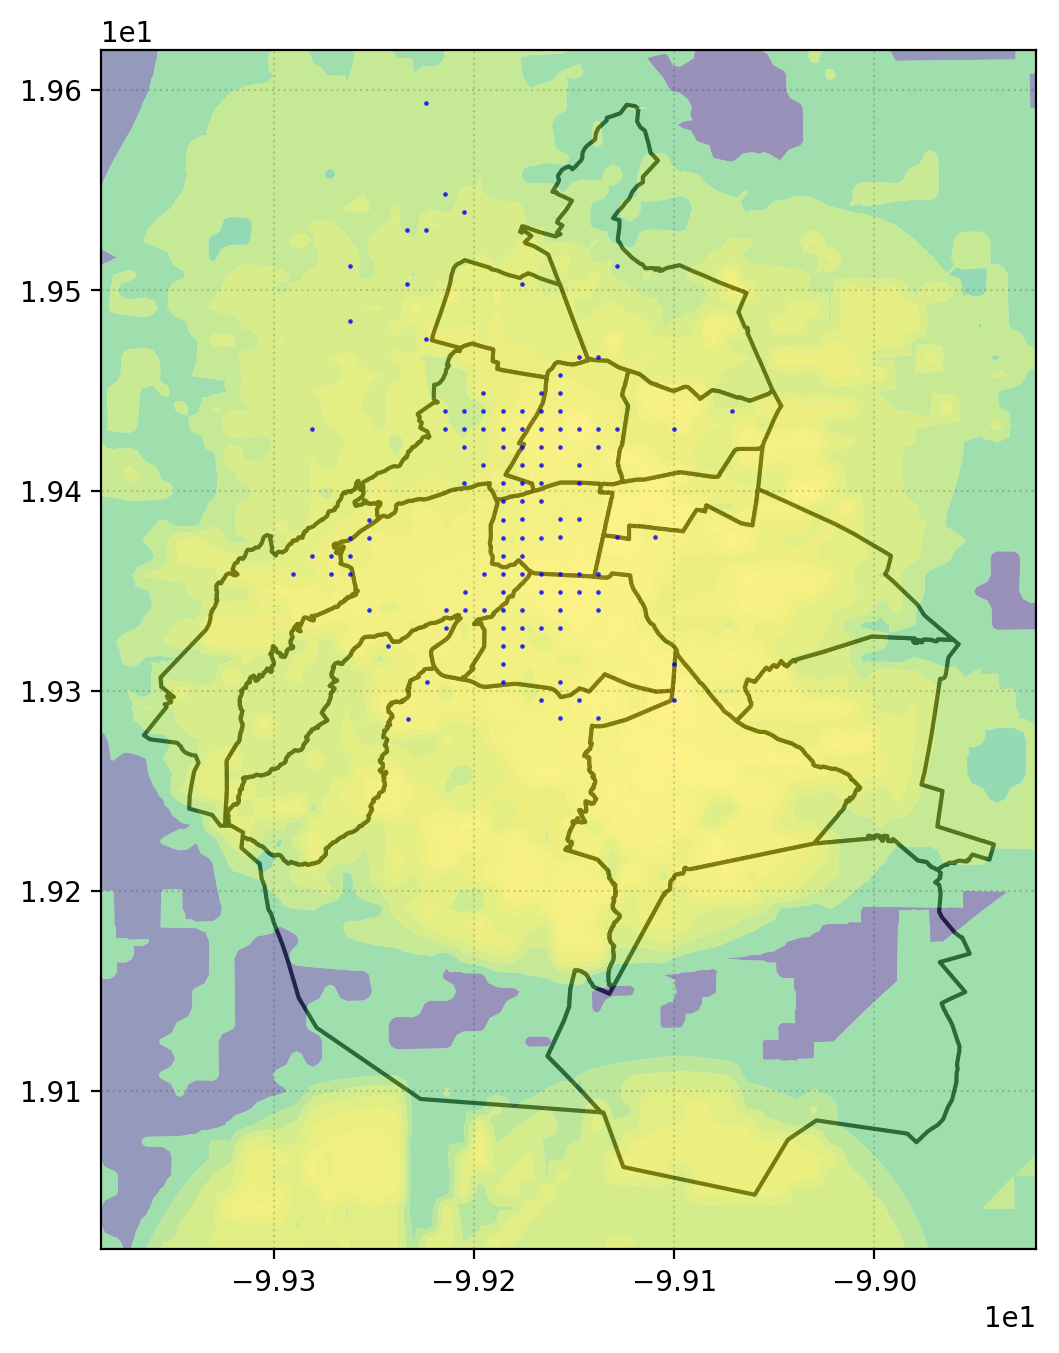

In [59]:
scale = 400
# Image size
nsubX = 1
nsubY = 0

width,height = 3*scale*(nsubX+1*(nsubX==0)),3*scale*(nsubY+1*(nsubY==0))

# Pixel border around image
border = 1

dpi = 200.0
figsize= (width+2*border)/float(dpi), (height+2*border)/float(dpi)
fig,ax = subplots((nsubY+1*(nsubY==0)),(nsubX+1*(nsubX==0)),
                  figsize=figsize, dpi=dpi, sharey=True)

hpixel = 1.0/(width+2*border)
vpixel = 1.0/(height+2*border)

fig.subplots_adjust(left=border*hpixel, bottom=border*vpixel, 
                    right=1-2*border*hpixel, top=1-2*border*vpixel, 
                    wspace=0, hspace=0)
#ax.locator_params(axis='y', nticks=6)
#ax.locator_params(axis='x', nticks=15)

ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax.grid(True, color='black', ls=':', alpha=0.15)
a = gdfCDMX.plot(ax = ax,column='CVE_MUN',alpha=1,color='w',edgecolor=(0,0,0),lw=1.5)
xlims = a.get_xlim()
ylims = a.get_ylim()
sismicShape.plot(ax = ax,column='PGAPOL_ID',alpha=0.55,cmap='viridis')#,edgecolor=(0,0.75,0.75),lw=1)
sismicStations.plot(ax = ax,marker='.',alpha=0.75,color='b', markersize=2)
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_aspect('equal')

In [230]:
ylims

(13.3359, 23.763899999999996)

In [43]:
sismicCDMX = gdfCDMX.intersection(sismicShape)

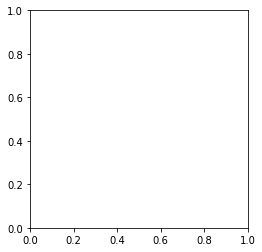

In [44]:
sismicCDMX.plot(column='CVE_MUN',alpha=1,color='w',edgecolor=(0,0,0),lw=1)

In [45]:
sismicCDMX.info()

AttributeError: 'GeoSeries' object has no attribute 'info'

In [46]:
sismicCDMX

0       ()
1       ()
2       ()
3       ()
4       ()
5       ()
6       ()
7       ()
8       ()
9       ()
10      ()
11      ()
12      ()
13      ()
14      ()
15      ()
16      ()
17      ()
18      ()
19      ()
20      ()
21      ()
22      ()
23      ()
24      ()
25      ()
26      ()
27      ()
28      ()
29      ()
        ..
3287    ()
3288    ()
3289    ()
3290    ()
3291    ()
3292    ()
3293    ()
3294    ()
3295    ()
3296    ()
3297    ()
3298    ()
3299    ()
3300    ()
3301    ()
3302    ()
3303    ()
3304    ()
3305    ()
3306    ()
3307    ()
3308    ()
3309    ()
3310    ()
3311    ()
3312    ()
3313    ()
3314    ()
3315    ()
3316    ()
Length: 3317, dtype: object